In [1]:
from tesser import util
from tesser import fit
from tesser import network
from tesser import sr
from tesser import rsa 

data_dir = '/home/rodrigo/Dropbox/tesser_successor/Data'

In [2]:
df = util.load_struct(data_dir, 100)
df.head()

,SubjNum,run,trial,objnum,file,orientnam,orientnum,resp,respnum,acc,rt,part,seqtype
0,100,1,1,10,object_2.jpg,cor,1.0,c,1.0,1.0,1.426618,1,NaN
1,100,1,2,5,object_30.jpg,cor,1.0,c,1.0,1.0,0.759233,1,NaN
2,100,1,3,4,object_12.jpg,cor,1.0,c,1.0,1.0,0.866177,1,NaN
3,100,1,4,3,object_7.jpg,cor,1.0,c,1.0,1.0,0.712731,1,NaN
4,100,1,5,1,object_6.jpg,cor,1.0,c,1.0,1.0,0.654236,1,NaN


In [3]:
M = sr.explore_runs(df, 'persist',0.5,0.5)

In [4]:
from tesser import plot_models

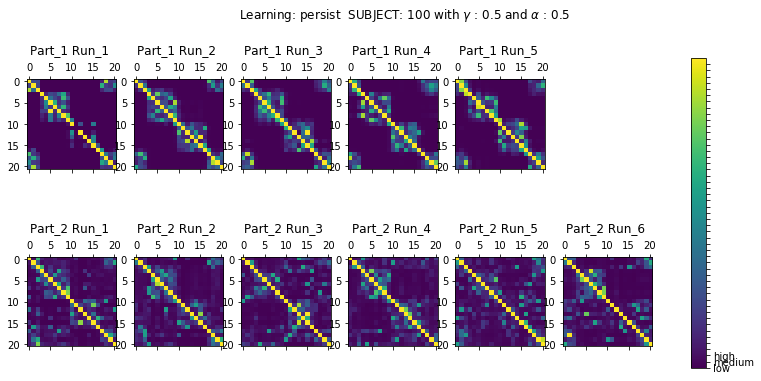

In [5]:
plot_models.plot_explore_runs(M, 100, 'persist',0.5,0.5)

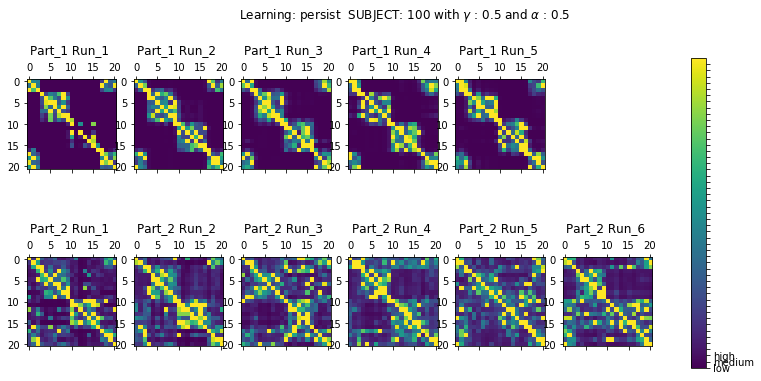

In [6]:
plot_models.plot_explore_runs(sr.explore_runs(df, 'track changes',0.5,0.5), 100, 'persist',0.5,0.5)

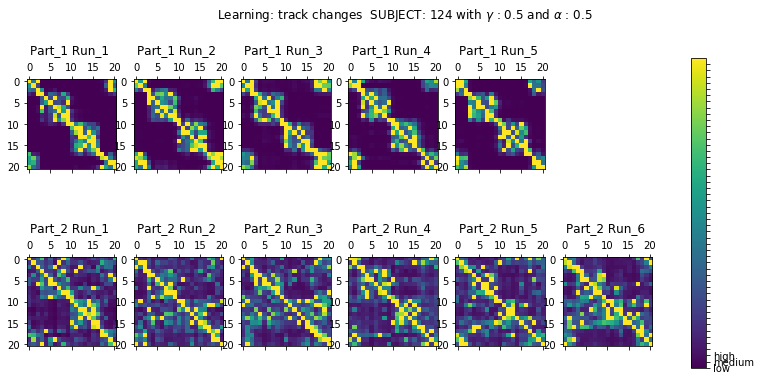

In [7]:
plot_models.plot_explore_runs(sr.explore_runs(util.load_struct(data_dir, 124),'track changes', 0.5,0.5), 124, 'track changes', 0.5, 0.5)

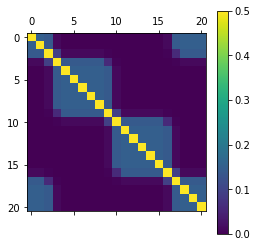

In [8]:
plot_models.plot_adjecncy_matrix()

In [9]:
sr.compute_correlations(df, 'correlation', 0.5, 0.5)

Correlation of L, M: 
0.9517576336522423


In [10]:
I = util.load_induction(data_dir, 100)

In [11]:
fit.get_log_likelihood(df, I, 0.5,0.5)

-59.51706804271513

In [12]:
fit.maximize_likelihood(df, I, 'differential evolution', 0.5,0.5)

--- 23.758134365081787 seconds ---


(0.8551942806418463, 1.0)

In [13]:
fit.maximize_likelihood(df, I, 'basinhopping', 0.5,0.5)

/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:54: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(trial_probability)
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:54: RuntimeWarning: invalid value encountered in log
  log_likelihood += np.log(trial_probability)
/home/rodrigo/anaconda3/lib/python3.7/site-packages/scipy/optimize/optimize.py:670: RuntimeWarning: invalid value encountered in double_scalars
  grad[k] = (f(*((xk + d,) + args)) - f0) / d[k]
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/sr.py:30: RuntimeWarning: overflow encountered in multiply
  self.onehot[s] + self.gamma * self.M[s_new]
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/sr.py:30: RuntimeWarning: invalid value encountered in add
  self.onehot[s] + self.gamma * self.M[s_new]
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/sr.py:29: RuntimeWarning: overflow encountered in multiply
  self.M[s] = (1 - s

--- 34.816853046417236 seconds ---


(1.0, 1.0)

In [14]:
fit.maximize_likelihood(df, I, 'brute', 0.5,0.5)

/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:11: RuntimeWarning: invalid value encountered in double_scalars
  return SR[A][B] / (SR[A][B] + SR[A][C])
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:54: RuntimeWarning: divide by zero encountered in log
  log_likelihood += np.log(trial_probability)
/home/rodrigo/Documents/preston_labs/tesser_successor/tesser/fit.py:54: RuntimeWarning: invalid value encountered in log
  log_likelihood += np.log(trial_probability)


TypeError: cannot unpack non-iterable numpy.float64 object

In [16]:
rdm = rsa.multiple_rdm(M)

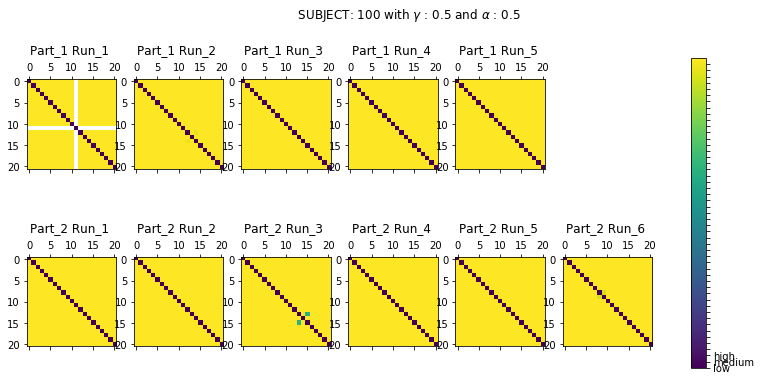

In [17]:
plot_models.plot_rdms(rdm, 100, 0.5, 0.5)